In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, LSTM

note that change the data source


In [2]:
data = pd.read_csv("D:\\học đại học\\20222\\machine learning\\saved_data.csv")



In [3]:
time=data['Date']
data=data.drop('Date', axis=1)
target="BTC_close"

In [4]:
data.head()

,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,Total_Fees(USD),...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
0,0.1,0.1,0.1,0.1,0.26,936.0,182.0,1090.745856,789700.0,0.000000,...,0.0,0.0,0.0,0.0,1191.7,17.693,0.00,1083.48,10229.96,9300.46
1,0.1,0.1,0.1,0.1,0.58,784.0,182.0,603.821256,499964.0,0.000000,...,0.0,0.0,0.0,0.0,1191.8,17.803,0.00,1069.59,10120.53,9278.83
2,0.1,0.1,0.1,0.1,2.16,594.0,182.0,572.443182,403000.0,0.000000,...,0.0,0.0,0.0,0.0,1195.6,18.120,7002.75,1093.67,10322.30,9220.88
3,0.1,0.1,0.1,0.1,2.40,655.0,182.0,530.932990,412004.0,0.000606,...,0.0,0.0,0.0,0.0,1187.8,18.101,7018.25,1102.66,10424.62,9430.96
4,0.1,0.1,0.1,0.1,0.50,959.0,182.0,1519.539683,1148772.0,0.000000,...,0.0,0.0,0.0,0.0,1187.8,18.101,7018.25,1102.66,10424.62,9430.96


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


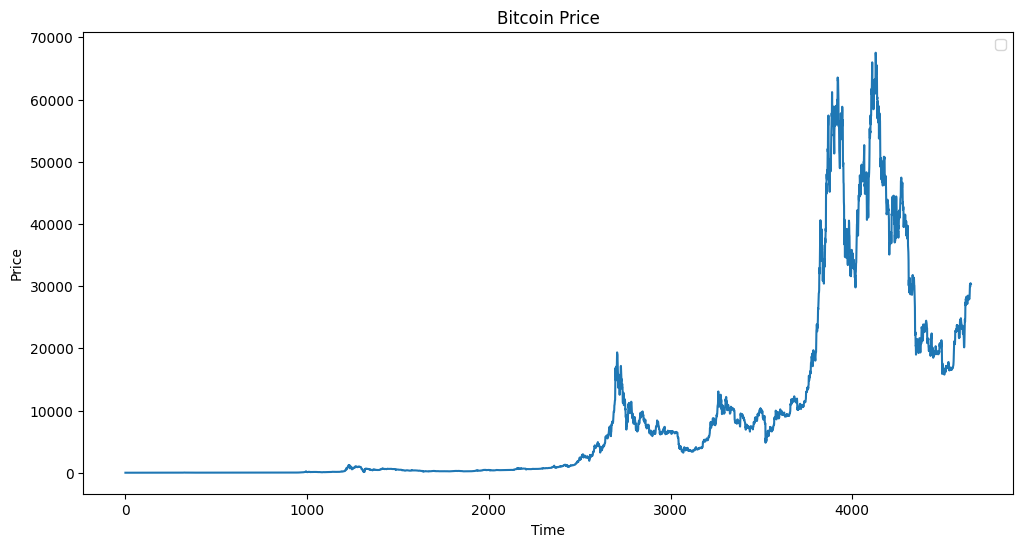

In [5]:
plt.figure(figsize=(12, 6))

plt.plot(data[target])

plt.title('Bitcoin Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [6]:
target=np.array(target)
target.shape

()

splitting data to train, valid, test set

In [7]:
train_data= data.copy().iloc[:int(0.7*len(data)),:]
train_np= train_data.to_numpy()
val_data=data.copy().iloc[int(0.7*len(data)):int(0.85*len(data)),:]
val_np=val_data.to_numpy()
test_data=data.copy().iloc[int(0.85*len(data)):,:]
test_np=test_data.to_numpy()

In [8]:
train_time=time[:int(0.7*len(data))]
val_time=time[int(0.7*len(data)):int(0.85*len(data))]
test_time=time[int(0.85*len(data)):]

In [9]:
train_np = np.asarray(train_np).astype('float32')
val_np = np.asarray(val_np).astype('float32')
test_np = np.asarray(test_np).astype('float32')

In [10]:
time_step=80

**Create data sequence, sequence length is time step and predict y is the right next day**

In [11]:
def scale_sequence_data(df,timesteps ,close_col_idx):
    x = []
    y = []
    for i in range(len(df)-timesteps):    
        scaler=MinMaxScaler()
        x.append(scaler.fit_transform(df[i:i+timesteps,:]))
        y.append(df[i+timesteps,close_col_idx])
    y=np.array(y)
    y=scaler.fit_transform(y.reshape(-1,1))
    return np.array(x),y.flatten()


In [12]:
train_x, train_y = scale_sequence_data(train_np, time_step,data.columns.get_loc('BTC_close'))
val_x,val_y =scale_sequence_data(val_np,time_step ,data.columns.get_loc('BTC_close'))
test_x, test_y = scale_sequence_data(test_np, time_step,data.columns.get_loc('BTC_close'))

**Build Model**

In [13]:

model = Sequential()
model.add(LSTM(units=100,return_sequences=True,recurrent_dropout=0.3))
model.add(LSTM(units=100,return_sequences =True,recurrent_dropout=0.3))
model.add(LSTM(units=100,return_sequences=False,recurrent_dropout=0.3))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='MeanSquaredError')
model.fit(train_x,train_y,epochs=20, batch_size=32,validation_data=(val_x,val_y))

Epoch 1/20
100/100 [==============================] - 34s 259ms/step - loss: 0.0309 - val_loss: 0.1004
Epoch 2/20
100/100 [==============================] - 25s 248ms/step - loss: 0.0111 - val_loss: 0.0908
Epoch 3/20
100/100 [==============================] - 24s 240ms/step - loss: 0.0068 - val_loss: 0.0917
Epoch 4/20
100/100 [==============================] - 25s 251ms/step - loss: 0.0048 - val_loss: 0.0933
Epoch 5/20
100/100 [==============================] - 25s 250ms/step - loss: 0.0041 - val_loss: 0.1033
Epoch 6/20
100/100 [==============================] - 26s 258ms/step - loss: 0.0025 - val_loss: 0.1123
Epoch 7/20
100/100 [==============================] - 25s 246ms/step - loss: 0.0022 - val_loss: 0.1076
Epoch 8/20
100/100 [==============================] - 26s 257ms/step - loss: 0.0016 - val_loss: 0.1132
Epoch 9/20
100/100 [==============================] - 25s 254ms/step - loss: 0.0013 - val_loss: 0.1107
Epoch 10/20
100/100 [==============================] - 26s 257ms/step - l

In [14]:
model.evaluate(train_x,train_y)
model.evaluate(val_x,val_y)
model.evaluate(test_x,test_y)

20/20 [==============================] - 1s 45ms/step - loss: 0.0677


0.06766177713871002

In [15]:
predictions = model.predict(test_x)
test_y=test_y.reshape(-1,1)

20/20 [==============================] - 2s 46ms/step


In [16]:
predictions.shape

(619, 1)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
test_y = test_y.reshape(-1)
predictions = predictions.reshape(-1)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 0.06766178
Mean Absolute Error (MAE): 0.22475314


In [18]:
prec_train=model.predict(train_x)
pre_val=model.predict(val_x)

20/20 [==============================] - 1s 44ms/step


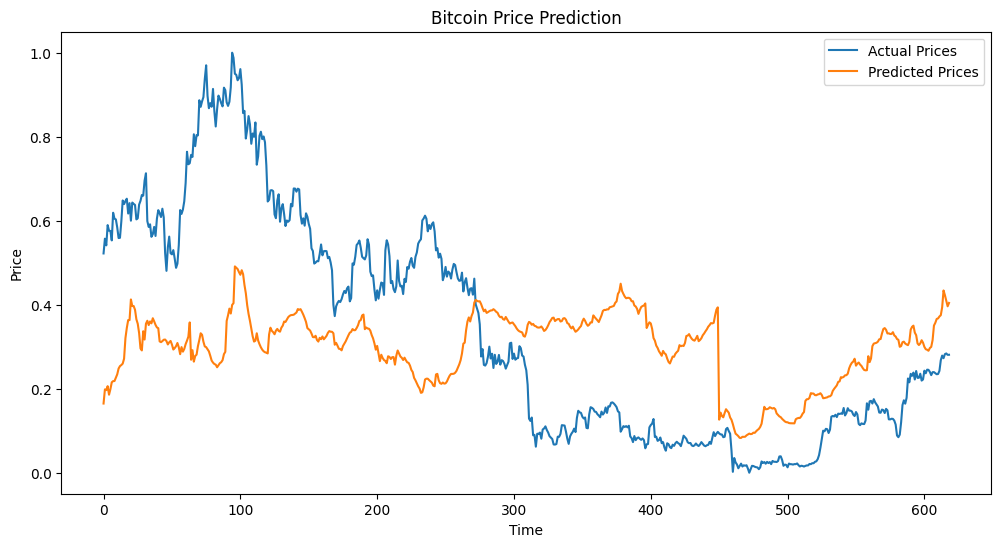

In [19]:

# Plot the predicted and actual prices
plt.figure(figsize=(12, 6))
plt.plot(test_y, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()